In [13]:
import sys
sys.path.append('../')
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from multiprocessing import Pool
from scipy.stats import binned_statistic
from funcs.analysis.analysis import analysis

In [14]:
obj = 'qsos'
ID  = 'uid'
band = 'r'
redshift_bool = True

In [15]:
def reader(n_subarray):
    return pd.read_csv('../../data/surveys/ztf/{}/lc_{}.csv'.format(obj, n_subarray), usecols = [0,1,2,3,4,5], index_col = 0, dtype = {'oid': np.uint64, 
                                                                                                                                           'mag': np.float32, 
                                                                                                                                           'magerr': np.float32, 
                                                                                                                                           'mjd': np.float64, 
                                                                                                                                           'uid': np.uint32})

In [16]:
dr = analysis(ID, obj)

In [17]:
dr.read_in(reader=reader);
dr.band = band

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
for band in 'gri':
    for 
        dr.df[dr.df['filtercode']==band].drop(columns='filtercode').to_csv('../../data/surveys/ztf/{}/lc_{}.csv'.format(obj,n))

oid           mjd        mag    magerr filtercode  \
uid                                                                     
1       550107300010245  58292.443287  21.206284  0.176351          g   
1       550207300019356  58292.479294  21.224922  0.173635          r   
1       550207300019356  58313.420544  21.226900  0.173756          r   
1       550107300010245  58313.461493  21.193981  0.175591          g   
1       550207300019356  58316.461458  21.428654  0.186065          r   
...                 ...           ...        ...       ...        ...   
526356  648111100008907  58641.448056  20.967428  0.168661          g   
526356  648211100005241  58641.476701  20.439253  0.132971          r   
526356  648211100005241  58644.476319  20.859413  0.163127          r   
526356  648211100005241  58653.445706  20.429710  0.132163          r   
526356  648111100008907  58660.456759  20.904644  0.164501          g   

        redshift        mjd_rf  
uid                             
1          2.309  17616.332211  
1          2.309  17616.343093  
1          2.309  17622.671666  
1          2.309  17622.684041  
1          2.309  17623.590649  
...          ...           ...  
526356     2.375  17375.243868  
526356     2.375  17375.252356  
526356     2.375  17376.141132  
526356     2.375  17378.798728  
526356     2.375  17380.876077  

[53028358 rows x 7 columns]

In [31]:
dr.group(read_in=True)

In [32]:
dr.df_grouped

n_tot  n_sdss  n_ps  n_ztf       mjd_min       mjd_max      mjd_ptp  \
uid                                                                           
1          21       0     4     17  55806.591422  58475.144699  2668.553277   
2          22       0    14      8  55452.480474  58487.101042  3034.620567   
3          35       0     8     27  55090.497735  58487.100579  3396.602844   
4          51       0    15     36  55088.515723  58655.441829  3566.926106   
5          51       0    17     34  55456.507581  58657.436319  3200.928738   
...       ...     ...   ...    ...           ...           ...          ...   
526352     32       2    12     18  52909.369624  58486.100787  5576.731163   
526353     75       3    12     60  52909.353868  58657.434954  5748.081086   
526354     61       0    20     41  55088.513900  58655.441829  3566.927929   
526355     57       0    14     43  55456.510792  58653.443866  3196.933073   
526356     55       3    10     42  52909.353868  58653.445706  5744.091838   

          mag_min    mag_max   mag_mean    mag_med  mag_opt_mean  \
uid                                                                
1       20.648458  21.771994  21.317080  21.306569     21.315989   
2       20.885572  21.628172  21.198467  21.271762     21.135025   
3       20.204323  21.184834  20.773436  20.790013     20.827051   
4       19.568613  20.046188  19.818385  19.835509     19.743008   
5       20.352556  21.183098  20.821302  20.881049     20.850035   
...           ...        ...        ...        ...           ...   
526352  20.730858  21.882521  21.302349  21.360371     21.368450   
526353  19.774813  20.351723  20.005419  20.000070     20.012985   
526354  18.583073  19.210831  19.015957  19.031451     18.991234   
526355  19.498184  20.385860  20.127076  20.140299     20.128464   
526356  20.423147  21.102133  20.707358  20.700085     20.698500   

        mag_opt_mean_flux   mag_std  magerr_max  magerr_mean  magerr_med  \
uid                                                                        
1               21.423073  0.271061    0.206130     0.177927    0.176572   
2               21.188592  0.209168    0.218896     0.138913    0.124060   
3               20.868925  0.188425    0.204730     0.151751    0.171758   
4               19.754317  0.110457    0.108703     0.081049    0.095109   
5               20.890839  0.186420    0.184414     0.141680    0.153264   
...                   ...       ...         ...          ...         ...   
526352          21.447101  0.252804    0.221980     0.170418    0.178788   
526353          20.047039  0.127899    0.110659     0.083262    0.090503   
526354          19.022792  0.127896    0.068640     0.048700    0.058925   
526355          20.155693  0.141968    0.196582     0.099176    0.101004   
526356          20.738442  0.164003    0.171621     0.129680    0.143323   

        magerr_opt_std  redshift   mjd_ptp_rf  
uid                                            
1             0.038441  2.309000   806.453091  
2             0.024397  2.103120   977.925531  
3             0.020783  2.497000   971.290490  
4             0.007828  1.619000  1361.942003  
5             0.017905  1.616210  1223.498256  
...                ...       ...          ...  
526352        0.024806  2.452000  1615.507289  
526353        0.007625  3.109000  1398.900240  
526354        0.004130  1.233161  1597.255088  
526355        0.010719  2.009941  1062.124865  
526356        0.013262  2.375000  1701.953137  

[522449 rows x 20 columns]

In [104]:
gb = dr.df.head(1000).groupby('uid')

In [105]:
mag = [group.values for _, group in gb['mag']]
magerr = [group.values for _, group in gb['magerr']]
mjd = [group.values for _, group in gb['mjd']]

## Cesium-ml

In [107]:
from cesium import datasets
from cesium import featurize

In [25]:
asas = datasets.fetch_asas_training('/disk1/hrb/python/analysis/ml/datasets/asas_training')

Loaded data from cached archive.


In [125]:
asas["classes"].unique()

array(['RR_Lyrae_FM', 'RSG', 'RR_Lyrae_FO', 'W_Ursae_Maj', 'RV_Tauri',
       'Mira', 'Delta_Scuti', 'Weakline_T_Tauri', 'Beta_Persei',
       'PopII_Cepheid', 'ChemPeculiar', 'Classical_Cepheid', 'Semireg_PV',
       'Herbig_AEBE', 'SARG_B', 'Beta_Lyrae', 'MultiMode_Cepheid', 'LSP',
       'ClassT_Tauri', 'Pulsating_Be', 'RS_CVn', 'SARG_A', 'Beta_Cephei',
       'RCB', 'Ellipsoidal', 'RR_Lyrae_DM', 'SX_Phe', 'S_Doradus'],
      dtype=object)

In [120]:
features_to_use = ["amplitude",
                   "percent_beyond_1_std",
                   "maximum",
                   "max_slope",
                   "median",
                   "median_absolute_deviation",
                   "percent_close_to_median",
                   "minimum",
                   "skew",
                   "std",
                   "weighted_average"]
fset_cesium = featurize.featurize_time_series(times=asas["times"],
                                              values=asas["measurements"],
                                              errors=None,
                                              features_to_use=features_to_use)

In [121]:
fset_cesium

feature amplitude percent_beyond_1_std maximum   max_slope   median  \
channel         0                    0       0           0        0   
0          0.6490             0.350554  12.052    4.150943  11.5615   
1          0.5070             0.237213  13.384  282.186235  12.7355   
2          0.7620             0.188353  13.679  385.483871  12.6680   
3          0.6730             0.356643  12.165    5.937684  11.7940   
4          1.0085             0.211849  13.763  403.984064  12.2870   
..            ...                  ...     ...         ...      ...   
805        0.3025             0.317662  10.648  114.864865  10.2450   
806        0.3055             0.246626  11.307  297.468354  10.8410   
807        0.8065             0.337941  12.985  204.504505  11.8990   
808        0.4860             0.130548  10.947  133.766234  10.0625   
809        0.4800             0.236542  13.059  510.000000  12.4690   

feature median_absolute_deviation percent_close_to_median minimum      skew  \
channel                         0                       0       0         0   
0                          0.2240                0.285978  10.754 -0.560225   
1                          0.0655                0.686067  12.370  1.218107   
2                          0.0800                0.742493  12.155  1.699849   
3                          0.2130                0.296037  10.819 -0.575801   
4                          0.0680                0.761221  11.746  1.836420   
..                            ...                     ...     ...       ...   
805                        0.0400                0.764930  10.043  0.689758   
806                        0.0380                0.714110  10.696  1.452455   
807                        0.1020                0.642018  11.372  0.205406   
808                        0.0295                0.988251   9.975  6.847200   
809                        0.0640                0.637847  12.099  0.939119   

feature       std weighted_average  
channel         0                0  
0        0.346095        11.463795  
1        0.128556        12.755086  
2        0.194281        12.703301  
3        0.323266        11.682198  
4        0.229417        12.313142  
..            ...              ...  
805      0.054545        10.244604  
806      0.069031        10.850379  
807      0.174666        11.904681  
808      0.055378        10.065593  
809      0.142143        12.496316  

[810 rows x 11 columns]

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(np.arange(len(asas["classes"])), random_state=0)

model_cesium = RandomForestClassifier(n_estimators=128, max_features="auto",
                                      random_state=0)
model_cesium.fit(fset_cesium.iloc[train], asas["classes"][train])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=128,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [123]:
from sklearn.metrics import accuracy_score
preds_cesium = model_cesium.predict(fset_cesium)

print("Built-in cesium features: training accuracy={:.2%}, test accuracy={:.2%}".format(
          accuracy_score(preds_cesium[train], asas["classes"][train]),
          accuracy_score(preds_cesium[test], asas["classes"][test])))

Built-in cesium features: training accuracy=100.00%, test accuracy=52.71%


In [46]:
# dr2.df_grouped.to_csv('../../data/surveys/ztf/ztfdr2_gb_uid.csv')

In [ ]:
bin_centres

In [ ]:
plt.scatter(bin_centres, (tss/counts)**0.5)

In [ ]:
plt.scatter(bin_centres,counts)

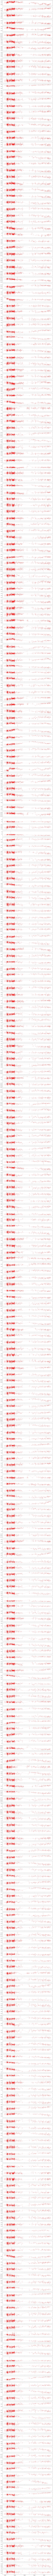

In [50]:
dr2.plot_series(uids = dr2.df_grouped.sort_values('mag_count',ascending=False).head(400).index,sharex=True)